In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
df = pd.read_csv('F:\AIMS DATA\Analytics\python_data/hotel_bookings.csv')

In [121]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [122]:
df.shape

(119390, 32)

In [123]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [124]:
df.isna().sum().sort_values(ascending = False)[:15]

company                        112593
agent                           16340
country                           488
children                            4
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
hotel                               0
previous_cancellations              0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
dtype: int64

In [125]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


1. For the four features containing missing values, we intend to replace them with '0'.
2. There are 119390 rowss and 32 columns.
3. agent: If no agency is given, booking was most likely made without one.
4. company: If none given, it was most likely private.
5. In the agent and the company column, we have id_number for each agent or company, so for all the missing values, we will just replace it with "0".
6. Country column contains country.It is categical feature.
7. We're going to fill in the missing values in country column with the most common value, which means the one that shows up the most. In this situation, we'll replace the missing values with the country that appears the most frequently i.e mode.

In [126]:
## For the missing values in the country column, replace it with mode (value that appears most often)
df[["agent","company"]] = df[["agent","company"]].fillna(0.0)

In [127]:
df['company'].dtype


dtype('float64')

In [128]:
## for missing children value, replace it with rounded mean value
df['country'].fillna(df.country.mode().to_string(), inplace=True)


In [129]:
df['company'].dtype

dtype('float64')

In [130]:
df['children'].fillna(round(df.children.mean()), inplace=True)

In [131]:
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])

In [132]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10],
      dtype=int64)

In [133]:
df['babies'].unique()

array([ 0,  1,  2, 10,  9], dtype=int64)

In [134]:
df[(df.adults + df.babies + df.children)==0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


We have 180 such rows and 32 columns.

In [135]:
df.shape

(119390, 32)

In [136]:
df = df.drop(df[(df.adults+df.babies+df.children)==0].index)

In [137]:
df.shape

(119210, 32)

In [138]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [139]:
df.isna().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

The data set is cleaned.

### After cleaning, separate Resort and City hotel

In [140]:
resort = df[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
city = df[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [141]:
resort.shape

(28927, 32)

In [142]:
city.shape

(46084, 32)

In [143]:
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

In [144]:
labels=resort['country'].value_counts().index
values=resort['country'].value_counts()

In [145]:
trace=go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value'
               )

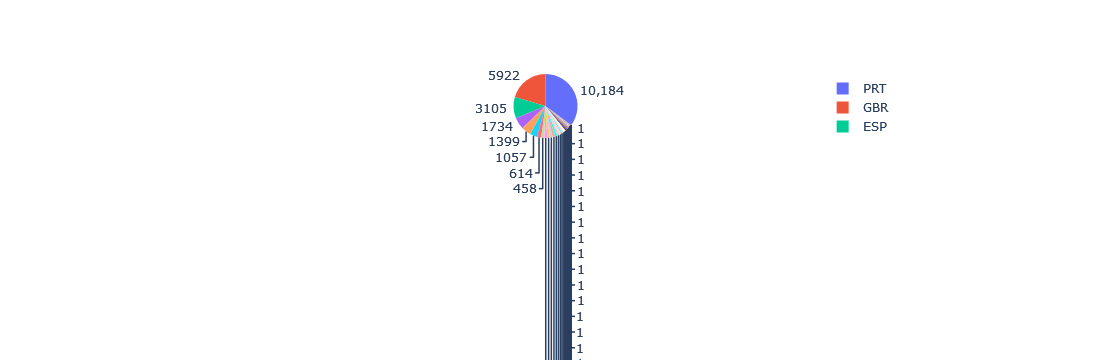

In [146]:
iplot([trace])

### How Many Booking Were Cancelled ?

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

def plot(x, y, x_label=None, y_label=None, title=None, figsize=(5,4), plot_type='bar'):
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize=figsize)
    
    if x_label:
        ax.set_xlabel(x_label)
    
    if y_label:
        ax.set_ylabel(y_label)
        
    if title:
        ax.set_title(title)
    
    if plot_type == 'bar':
        sns.barplot(x=x, y=y, ax=ax)  # Use keyword arguments x and y
    elif plot_type == 'line':
        sns.lineplot(x=x, y=y, ax=ax)  # Use keyword arguments x and y
    
    plt.show()



In [148]:
import pandas as pd

def get_count(series, limit=None):
    if limit is not None:
        value_counts = series.value_counts().head(limit)
    else:
        value_counts = series.value_counts()
    
    x = value_counts.index.values
    y = (value_counts / value_counts.sum()) * 100
    
    return x, y


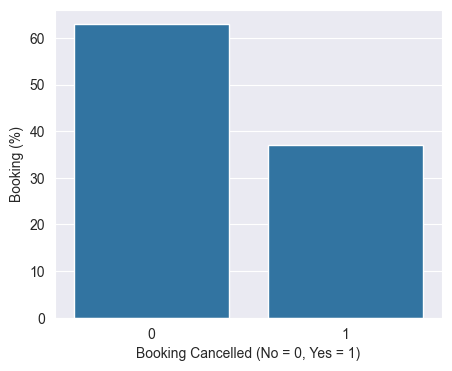

In [149]:
x,y = get_count(df['is_canceled'])
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

Select only not canceled Boolings.

In [150]:
df_not_canceled = df[df['is_canceled'] == 0]

### booking ratio between Resort Hotel and City Hotel?

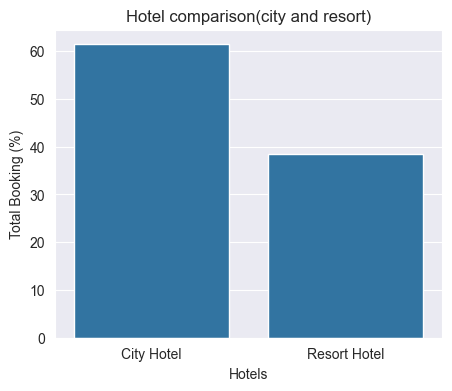

In [151]:

x, y = get_count(df_not_canceled['hotel'])
plot(x, y, x_label='Hotels', y_label ='Total Booking (%)', title='Hotel comparison(city and resort)')


### percentage of booking for each year

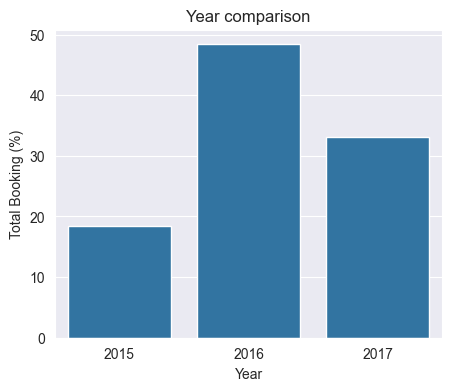

In [152]:
x,y = get_count(df_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

<Axes: xlabel='arrival_date_year', ylabel='count'>

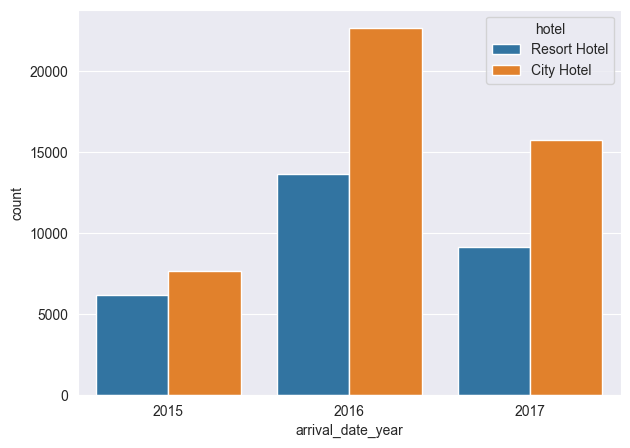

In [153]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df_not_canceled)

## Which are the most busy month or in which months Guests are high?


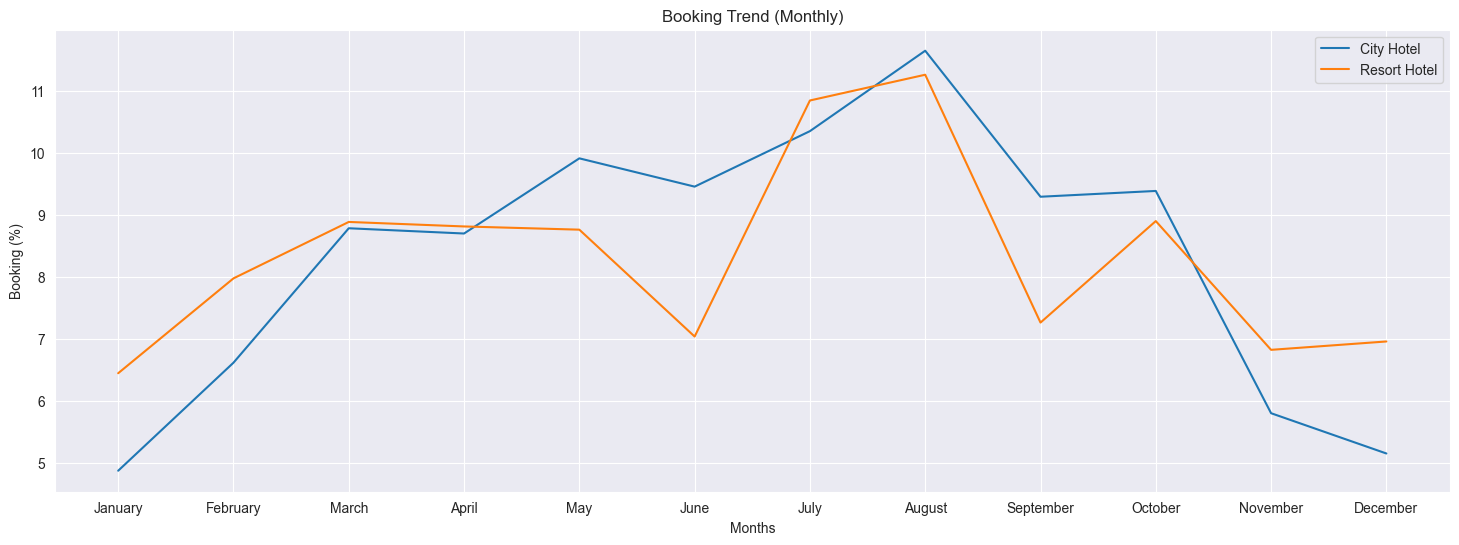

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

city_hotel = df_not_canceled[df_not_canceled['hotel'] == 'City Hotel']

# Count arrivals by month and reindex to the specified order
city_month_counts = city_hotel['arrival_date_month'].value_counts().reindex(new_order)

# Calculate the percentage of bookings for each month
city_month_percentages = (city_month_counts / city_month_counts.sum()) * 100

resort_hotel = df_not_canceled[df_not_canceled['hotel'] == 'Resort Hotel']
resort_month_counts = resort_hotel['arrival_date_month'].value_counts().reindex(new_order)
resort_month_percentages = (resort_month_counts / resort_month_counts.sum()) * 100
# Draw the line plot
fig, ax = plt.subplots(figsize=(18, 6))

ax.set_xlabel('Months')
ax.set_ylabel('Booking (%)')
ax.set_title('Booking Trend (Monthly)')

sns.lineplot(x=new_order, y=city_month_percentages.values, label='City Hotel')
sns.lineplot(x=new_order, y=resort_month_percentages.values, label='Resort Hotel')

plt.legend()
plt.show()


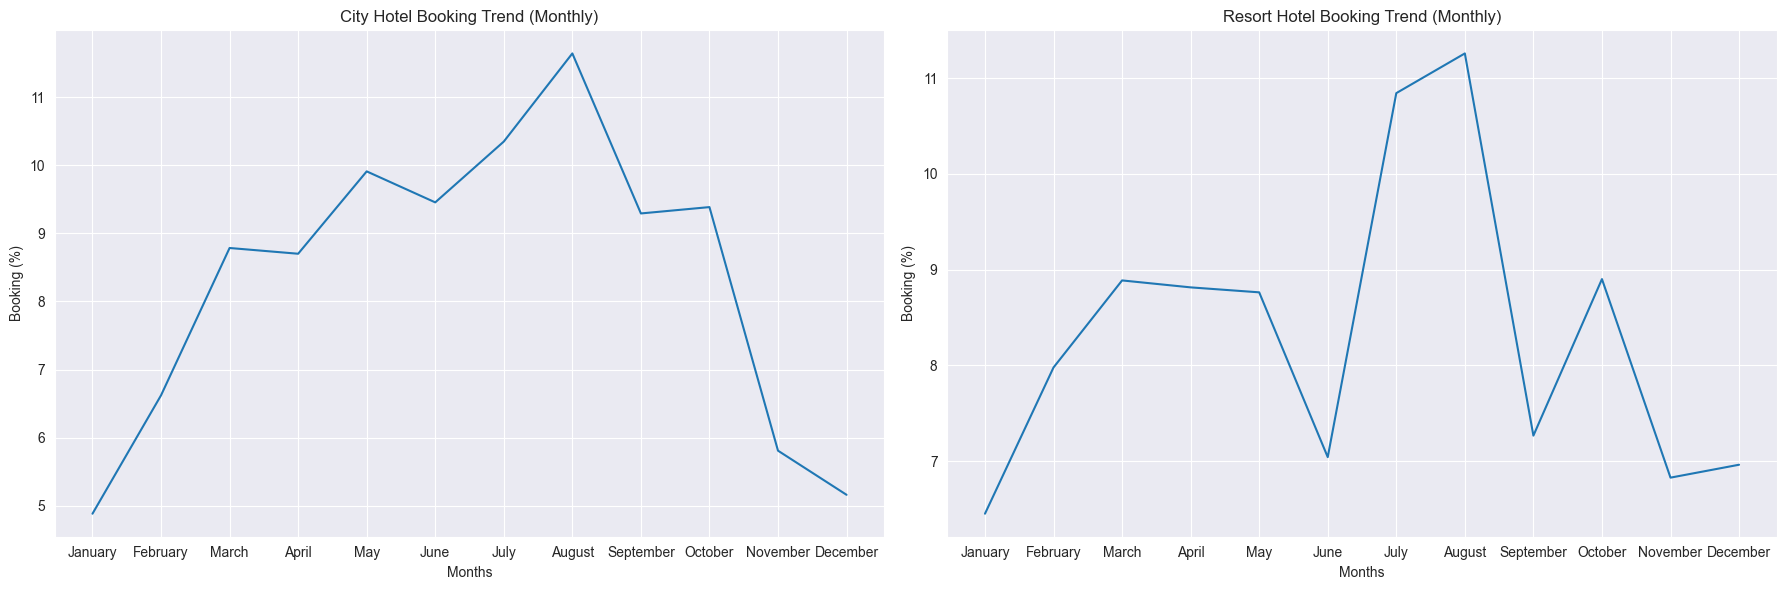

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order of months
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Filter the DataFrame for non-canceled bookings
df_not_canceled = df[df['is_canceled'] == 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: City Hotel
city_hotel = df_not_canceled[df_not_canceled['hotel'] == 'City Hotel']
city_month_counts = city_hotel['arrival_date_month'].value_counts().reindex(new_order)
city_month_percentages = (city_month_counts / city_month_counts.sum()) * 100
ax1.set_xlabel('Months')
ax1.set_ylabel('Booking (%)')
ax1.set_title('City Hotel Booking Trend (Monthly)')
sns.lineplot(x=new_order, y=city_month_percentages.values, ax=ax1)

# Subplot 2: Resort Hotel
resort_hotel = df_not_canceled[df_not_canceled['hotel'] == 'Resort Hotel']
resort_month_counts = resort_hotel['arrival_date_month'].value_counts().reindex(new_order)
resort_month_percentages = (resort_month_counts / resort_month_counts.sum()) * 100
ax2.set_xlabel('Months')
ax2.set_ylabel('Booking (%)')
ax2.set_title('Resort Hotel Booking Trend (Monthly)')
sns.lineplot(x=new_order, y=resort_month_percentages.values, ax=ax2)

plt.tight_layout()
plt.show()


### most booked accommodation type (Single, Couple, Family)

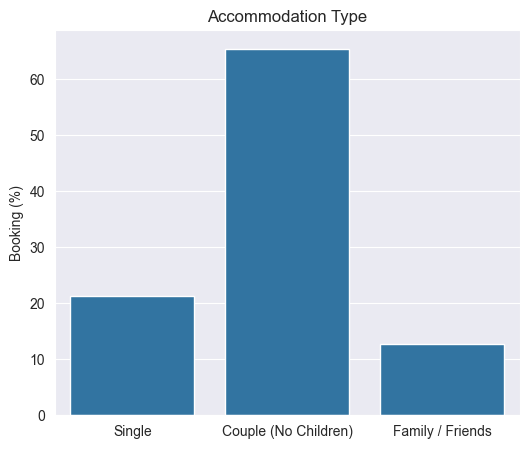

In [156]:
single   = df_not_canceled[(df_not_canceled.adults==1) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
couple   = df_not_canceled[(df_not_canceled.adults==2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
#n_adults = df_not_canceled[(df_not_canceled.adults>2) & (df_not_canceled.children==0) & (df_not_canceled.babies==0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(6,5))

### From which country most guest come

In [157]:
country_wise_df=df[df['is_canceled']==0]['country'].value_counts().reset_index()
country_wise_df.columns=['country','No of guests']
country_wise_df

,country,No of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


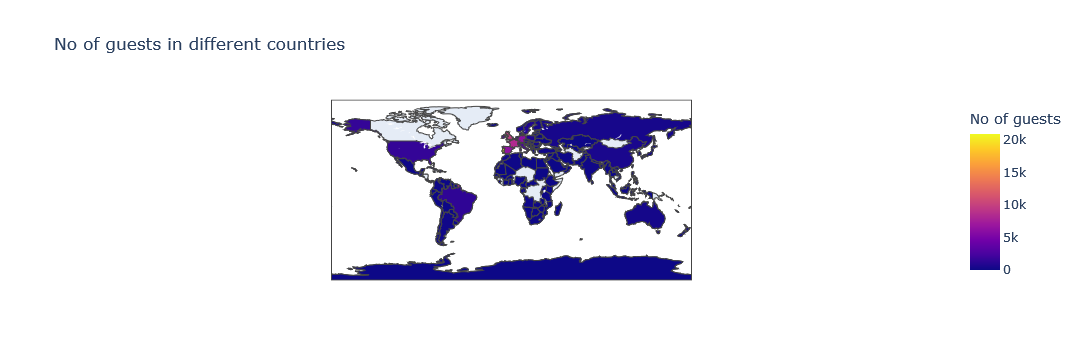

In [158]:
# show on map
map_guest = px.choropleth(country_wise_df,
                    locations=country_wise_df['country'],
                    color=country_wise_df['No of guests'], 
                    hover_name=country_wise_df['country'], 
                    title="No of guests in different countries")
map_guest.show()

### How Long People Stay in the hotel

In [159]:
filter=df['is_canceled']==0  # is_cancelled == 0(False) i will get people who stayed or checked- in
clean_df=df[filter]

In [160]:
clean_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [161]:
clean_df["stays_in_weekend_nights"].unique() 

array([ 0,  1,  2,  4,  3, 13,  6,  8,  5,  7, 12, 18, 19,  9, 10, 16, 14],
      dtype=int64)

In [162]:
clean_df["stays_in_week_nights"].unique() 

array([ 0,  1,  2,  4,  5, 10, 11,  3,  8,  6,  7,  9, 33, 12, 20, 15, 21,
       13, 30, 42, 50, 25, 14, 17, 32, 16, 40, 19, 26, 34, 18],
      dtype=int64)

In [163]:
import warnings
warnings.filterwarnings("ignore")

In [164]:
clean_df["total_nights"] = clean_df["stays_in_weekend_nights"] + clean_df["stays_in_week_nights"]

In [165]:
clean_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [166]:
clean_df.shape

(75011, 33)

In [167]:
x = clean_df.groupby(by=['total_nights','hotel']).count()[["is_canceled"]].reset_index()
x[x["hotel"]== "City Hotel"].sort_values(by=["is_canceled"],ascending= False)

,total_nights,hotel,is_canceled
6,3,City Hotel,11889
4,2,City Hotel,10983
2,1,City Hotel,9155
8,4,City Hotel,7694
10,5,City Hotel,3210
14,7,City Hotel,1245
12,6,City Hotel,1111
0,0,City Hotel,251
16,8,City Hotel,205
18,9,City Hotel,119


In [168]:
x[x["hotel"]== "Resort Hotel"].sort_values(by=["is_canceled"],ascending= False)

,total_nights,hotel,is_canceled
3,1,Resort Hotel,6579
5,2,Resort Hotel,4488
15,7,Resort Hotel,4434
7,3,Resort Hotel,3828
9,4,Resort Hotel,3321
11,5,Resort Hotel,1899
13,6,Resort Hotel,1205
21,10,Resort Hotel,699
29,14,Resort Hotel,630
17,8,Resort Hotel,509


### Bar and line plot

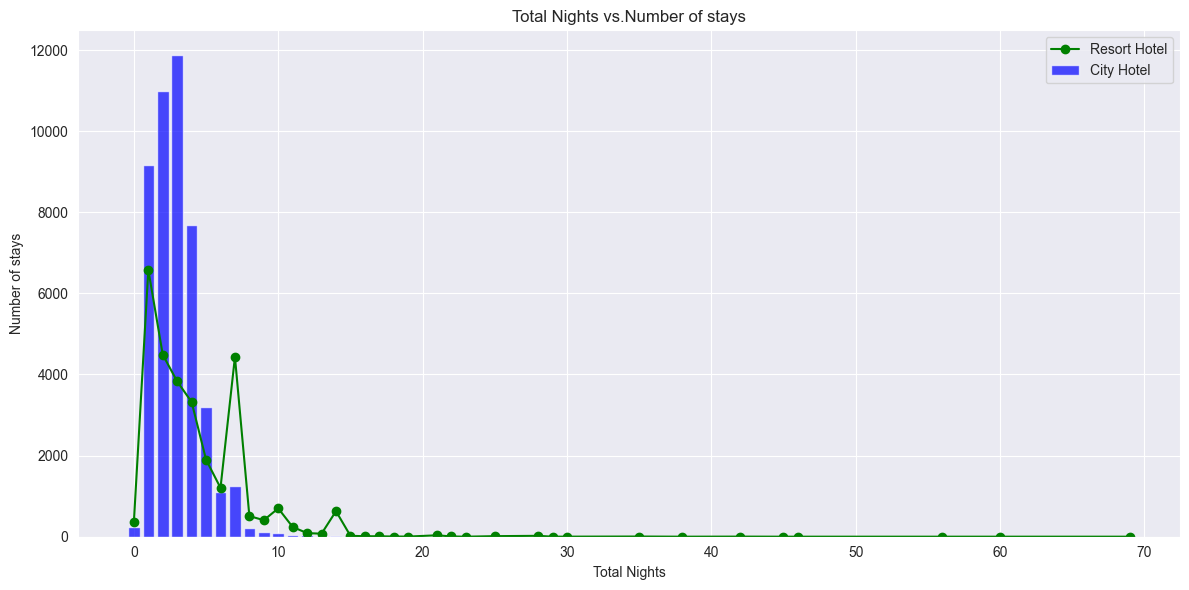

In [169]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have already computed 'x' as mentioned in your question
# If not, you can create 'x' using the provided code:
# x = clean_data.groupby(by=['total_nights', 'hotel']).count()[["is_canceled"]].reset_index()

# Filter data for City Hotel and Resort Hotel
city_hotel_data = x[x['hotel'] == 'City Hotel']
resort_hotel_data = x[x['hotel'] == 'Resort Hotel']

# Create a bar graph for City Hotel
plt.figure(figsize=(12, 6))
plt.bar(city_hotel_data['total_nights'], city_hotel_data['is_canceled'], label='City Hotel', color='blue', alpha=0.7)

# Create a line chart for Resort Hotel
plt.plot(resort_hotel_data['total_nights'], resort_hotel_data['is_canceled'], label='Resort Hotel', marker='o', linestyle='-', color='green')

# Customize the plot
plt.title('Total Nights vs.Number of stays')
plt.xlabel('Total Nights')
plt.ylabel('Number of stays')
plt.legend(loc='upper right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


### OR using Barplot

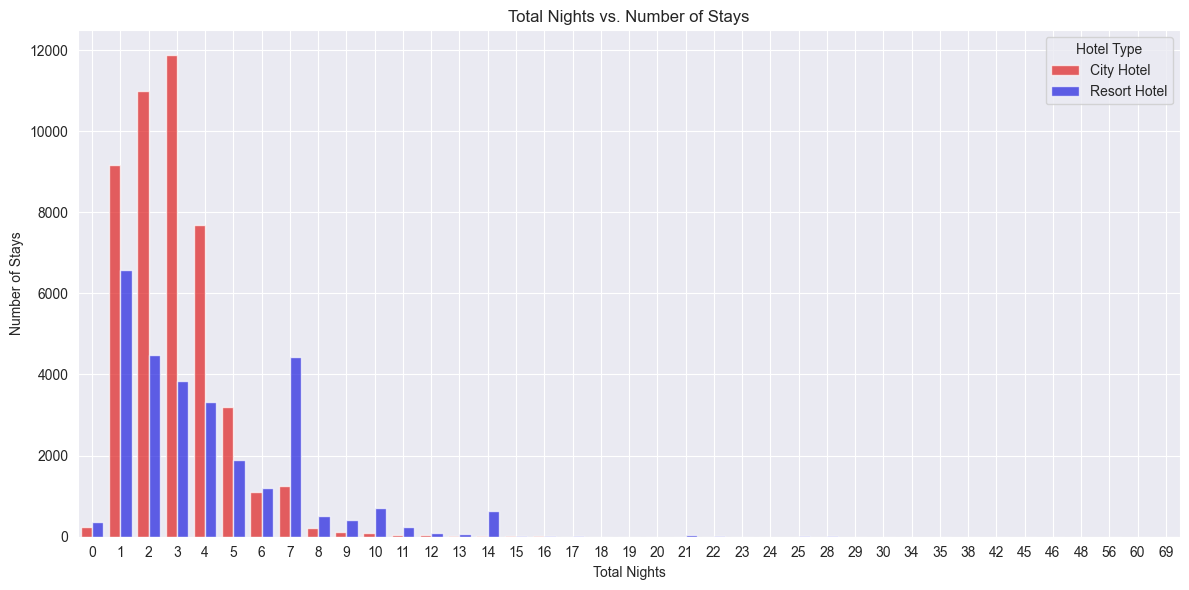

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine both datasets into one
combined_data = pd.concat([city_hotel_data, resort_hotel_data])

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Create a barplot with hue to distinguish between City Hotel and Resort Hotel
sns.barplot(x='total_nights', y='is_canceled', data=combined_data, hue='hotel', palette={"City Hotel": "Red", "Resort Hotel": "blue"}, alpha=0.7)

# Customize the plot
plt.title('Total Nights vs. Number of Stays')
plt.xlabel('Total Nights')
plt.ylabel('Number of Stays')
plt.legend(title='Hotel Type')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()



### How does the price per night vary over the year?

In [171]:
df_resort=resort[resort['is_canceled']==0]

In [172]:
df_city=city[city['is_canceled']==0]

In [173]:
df_resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [174]:
df_resort["adr"].value_counts()

adr
48.00     785
0.00      657
60.00     376
35.00     359
68.00     323
         ... 
38.32       1
187.40      1
185.25      1
168.98      1
99.06       1
Name: count, Length: 5041, dtype: int64

In [175]:
x = df_resort.groupby(by=['arrival_date_month']).mean()[["adr"]].reset_index()
x.sort_values(by=["adr"],ascending=False)

#adr = revenue/rooms sold 

TypeError: agg function failed [how->mean,dtype->object]

In [176]:
x = df_resort.groupby(by=['arrival_date_month']).mean(numeric_only=True)[["adr"]].reset_index()
print(df_resort['adr'].unique())


#adr = revenue/rooms sold 

[  0.    75.    98.   ... 202.27 153.57  99.06]


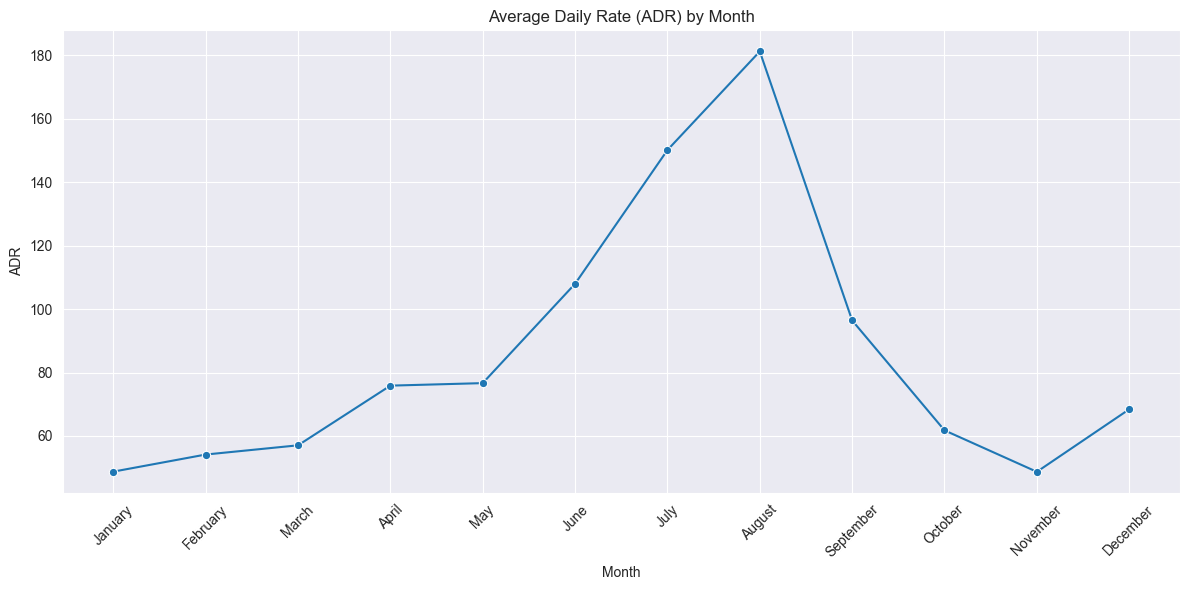

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already computed 'x' as mentioned in your question
# If not, you can create 'x' using the provided code:
# x = data_resort.groupby(by=['arrival_date_month']).mean()[["adr"]].reset_index()

# Define the order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Convert "arrival_date_month" to a categorical variable with the desired order
x['arrival_date_month'] = pd.Categorical(x['arrival_date_month'], categories=month_order, ordered=True)

# Create a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=x, x='arrival_date_month', y='adr', marker='o')

# Customize the plot
plt.title('Average Daily Rate (ADR) by Month')
plt.xlabel('Month')
plt.ylabel('ADR')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


In [178]:
resort_hotel=df_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [179]:
city_hotel=df_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [180]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel'] # rename
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


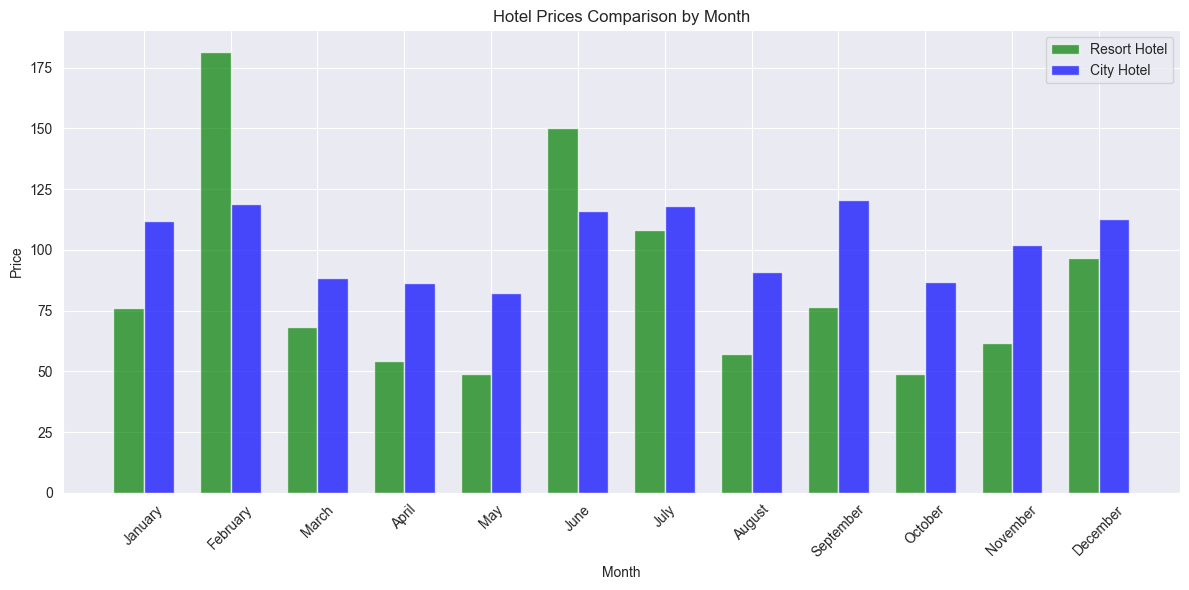

In [181]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the 'final' DataFrame with columns 'month', 'price_for_resort', and 'price_for_city_hotel'

# Set the figure size
plt.figure(figsize=(12, 6))

# Define the months and their positions on the x-axis
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
x = np.arange(len(month_order))  # Use month_order here

# Define bar width
bar_width = 0.35

# Create bars for the resort hotel
plt.bar(x - bar_width/2, final['price_for_resort'], bar_width, label='Resort Hotel', color='green', alpha=0.7)

# Create bars for the city hotel next to resort hotel bars
plt.bar(x + bar_width/2, final['price_for_city_hotel'], bar_width, label='City Hotel', color='blue', alpha=0.7)

# Customize the plot
plt.title('Hotel Prices Comparison by Month')
plt.xlabel('Month')
plt.ylabel('Price')
plt.xticks(x, month_order, rotation=45)  # Use month_order for x-axis labels
plt.legend()

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Bookings by market segment

In [182]:
clean_df['market_segment'].value_counts()

market_segment
Online TA        35673
Offline TA/TO    15880
Direct           10648
Groups            7697
Corporate         4291
Complementary      639
Aviation           183
Name: count, dtype: int64

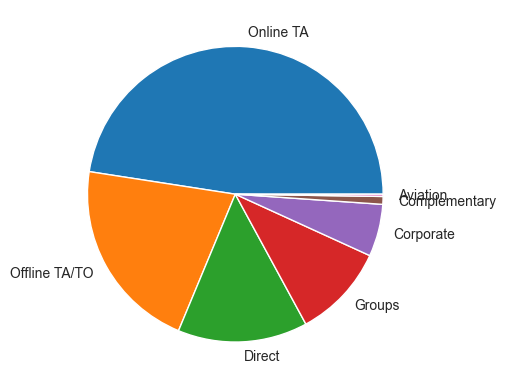

In [183]:
plt.pie(clean_df['market_segment'].value_counts().values, labels = clean_df['market_segment'].value_counts().index)
plt.show()

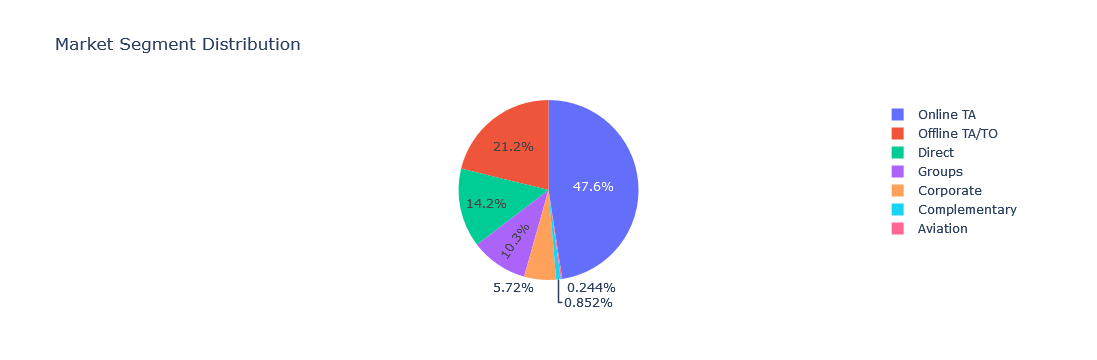

In [187]:
import plotly.express as px
import pandas as pd

# Assuming you have your data loaded into a DataFrame named clean_df
# If not, replace this with your data loading code

# Count the occurrences of each market segment
market_segment_counts = clean_df['market_segment'].value_counts().reset_index()

# Rename columns for clarity
market_segment_counts.columns = ['market_segment', 'count']

# Create a pie chart
fig = px.pie(market_segment_counts, 
             values='count',  # This should be the count, not the market_segment column
             names='market_segment',
             title='Market Segment Distribution')

fig.show()


### conclusion:-


1. Approximately 35% of the reservations were canceled, indicating a significant cancellation rate.

2. The City hotel was the preferred choice for accommodation, attracting more than 60% of the total bookings.

3. Bookings in 2016 showed substantial growth, more than doubling compared to the previous year. However, in the following year, there was a notable decline of nearly 15%.

4. The peak booking months were July and August, while the lowest booking activity occurred at the beginning and end of the year.

5. The top five countries contributing the majority of guests are Portugal, the UK, France, Spain, and Germany, collectively accounting for over 80% of all visitors.

6. Most guests tend to stay for one, two, or three nights.
   - For Resort hotels, the most common durations are three, two, one, and four days, in that order.
   - In the case of City hotels, the preferred stay durations are one night, two nights, seven nights (a week), and three nights, respectively.